In [4]:
import numpy as np
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from collections import Counter
import re
import string
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from keras.datasets import boston_housing

Точность классификации: 0.7750


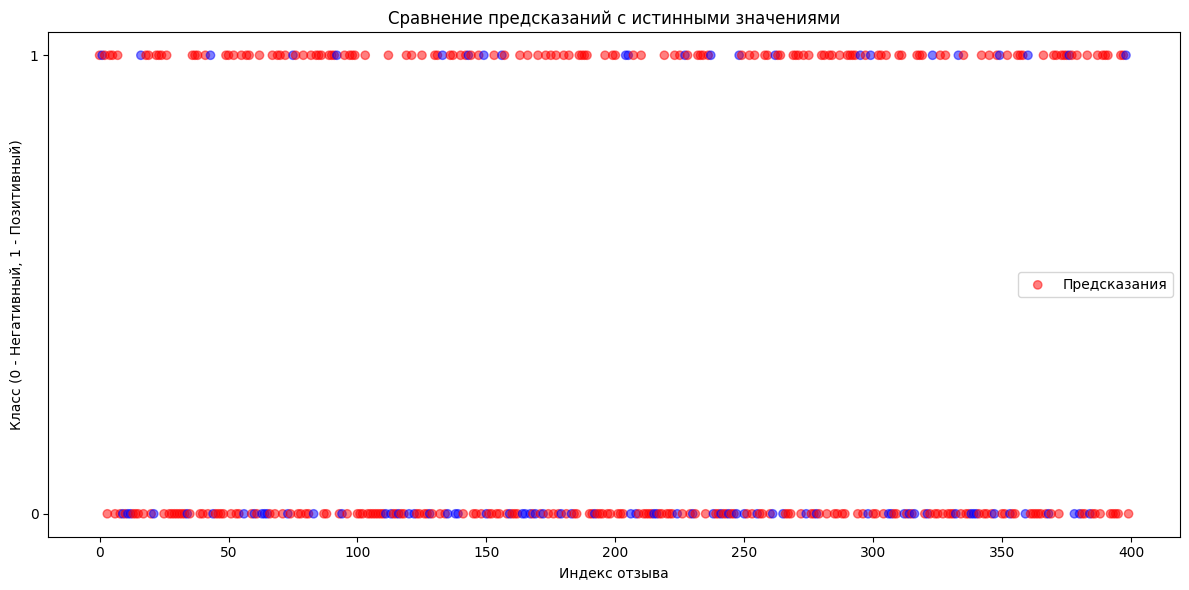

In [8]:
data_dir = 'data/movie'
neg_dir = os.path.join(data_dir, 'neg')
pos_dir = os.path.join(data_dir, 'pos')

def clean_text(text):
    text = text.lower()
    text = re.sub(f'[{string.punctuation}]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def load_data(neg_dir, pos_dir):
    reviews = []
    labels = []
    
    neg_files = glob.glob(os.path.join(neg_dir, '*.txt'))
    for file_path in neg_files:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            reviews.append(clean_text(text))
            labels.append(0)
    
    pos_files = glob.glob(os.path.join(pos_dir, '*.txt'))
    for file_path in pos_files:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            reviews.append(clean_text(text))
            labels.append(1)
    
    return reviews, np.array(labels)

def vectorize_texts(reviews):
    all_words = []
    for review in reviews:
        words = review.split()
        all_words.extend(words)
    
    word_counts = Counter(all_words)
    
    min_count = 5
    max_frequency = 0.7 * len(reviews)
    
    filtered_words = [word for word, count in word_counts.items() 
                     if count >= min_count and count <= max_frequency]
    
    word_to_index = {word: idx for idx, word in enumerate(filtered_words)}
    
    X = np.zeros((len(reviews), len(word_to_index)))
    
    for i, review in enumerate(reviews):
        words = set(review.split())
        for word in words:
            if word in word_to_index:
                X[i, word_to_index[word]] = 1
    
    return X, word_to_index

reviews, labels = load_data(neg_dir, pos_dir)

X, word_to_index = vectorize_texts(reviews)

X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.2, random_state=42
)

clf = BernoulliNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Точность классификации: {accuracy:.4f}")
plt.figure(figsize=(12, 6))

correct = y_test == y_pred
colors = ['red' if c else 'blue' for c in correct]
# plt.scatter(range(len(y_test)), y_test, color='green', alpha=0.5, label='Истинные метки')
plt.scatter(range(len(y_pred)), y_pred, color=colors, alpha=0.5, label='Предсказания')
plt.title('Сравнение предсказаний с истинными значениями')
plt.xlabel('Индекс отзыва')
plt.ylabel('Класс (0 - Негативный, 1 - Позитивный)')
plt.yticks([0, 1])
plt.legend()
plt.tight_layout()
plt.show()

0.7359429786015228


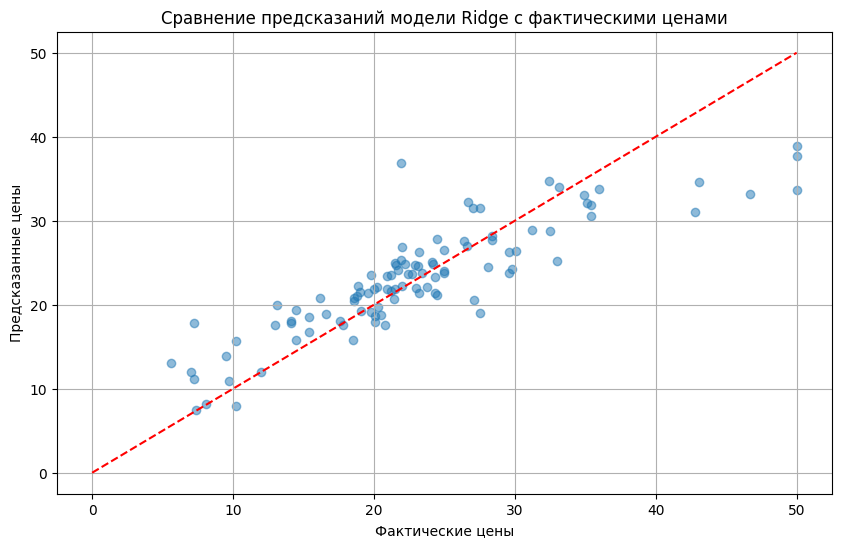

In [ ]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
train_data -= train_data.mean(axis=0)
train_data /= train_data.std(axis=0)
test_data -= test_data.mean(axis=0)
test_data /= test_data.std(axis=0)


model = Ridge(alpha=100)
model.fit(train_data, train_targets)

test_predictions = model.predict(test_data)
print(model.score(test_data, test_targets))
plt.figure(figsize=(10, 6))
plt.scatter(test_targets, test_predictions, alpha=0.5)
plt.plot([0, max(test_targets)], [0, max(test_targets)], 'r--')
plt.xlabel('Фактические цены')
plt.ylabel('Предсказанные цены')
plt.title('Сравнение предсказаний модели Ridge с фактическими ценами')
plt.grid(True)
plt.show()